#**Importing the Required Libraries**

In [5]:
import os


In [6]:
import glob

In [7]:
from IPython.display import Image, display

In [8]:
from IPython import display

In [9]:
display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [10]:
!nvidia-smi

Thu Feb 29 04:23:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [14]:
HOME = os.getcwd()

In [15]:
print(HOME)

/content


#**Installing Ultralytics using Pip Install**

In [9]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.2/716.2 kB 13.9 MB/s eta 0:00:00


##Checking whether YOLOv8 is Installed and its working Fine

In [16]:
import ultralytics

In [17]:
ultralytics.checks()

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)


#**Importing the Potholes Images Dataset from Roboflow**

In [12]:
!mkdir {HOME}/datasets


In [13]:
!pwd

/content


In [23]:
%cd {HOME}/datasets


/content/datasets


In [24]:
!pwd

/content/datasets


In [25]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8joVH7TL2k5V6uScFBEy")
project = rf.workspace("moinfaisal").project("potholes-detection-yolonas")
dataset = project.version(4).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to potholes-detection-yolonas-4 in yolov5pytorch:: 100%|██████████| 3166/3166 [00:00<00:00, 4663.61it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [28]:
%cd {HOME}

/content


In [29]:
%cd {dataset.location}

/content/datasets/potholes-detection-yolonas-4


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data='/content/datasets/potholes-detection-yolonas-4/data.yaml' epochs=70 imgsz=640

/content
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/potholes-detection-yolonas-4/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

In [ ]:
!ls {HOME}//runs/detect/train

args.yaml					   train_batch2.jpg
confusion_matrix.png				   train_batch5040.jpg
events.out.tfevents.1676118071.27e57c338735.867.0  train_batch5041.jpg
F1_curve.png					   train_batch5042.jpg
P_curve.png					   val_batch0_labels.jpg
PR_curve.png					   val_batch0_pred.jpg
predictions.json				   val_batch1_labels.jpg
R_curve.png					   val_batch1_pred.jpg
results.csv					   val_batch2_labels.jpg
results.png					   val_batch2_pred.jpg
train_batch0.jpg				   weights
train_batch1.jpg


#**Displaying the Confusion Matrix**

In [ ]:
#Confusion matrix is the chart that shows how our model handles different classes
#68% of the time the model detected correctly that there is a pothole, while 32% of the time, when the pothole is there but the model is not
#able to detect it
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

/content


#**Training and Validation Loss**

/content


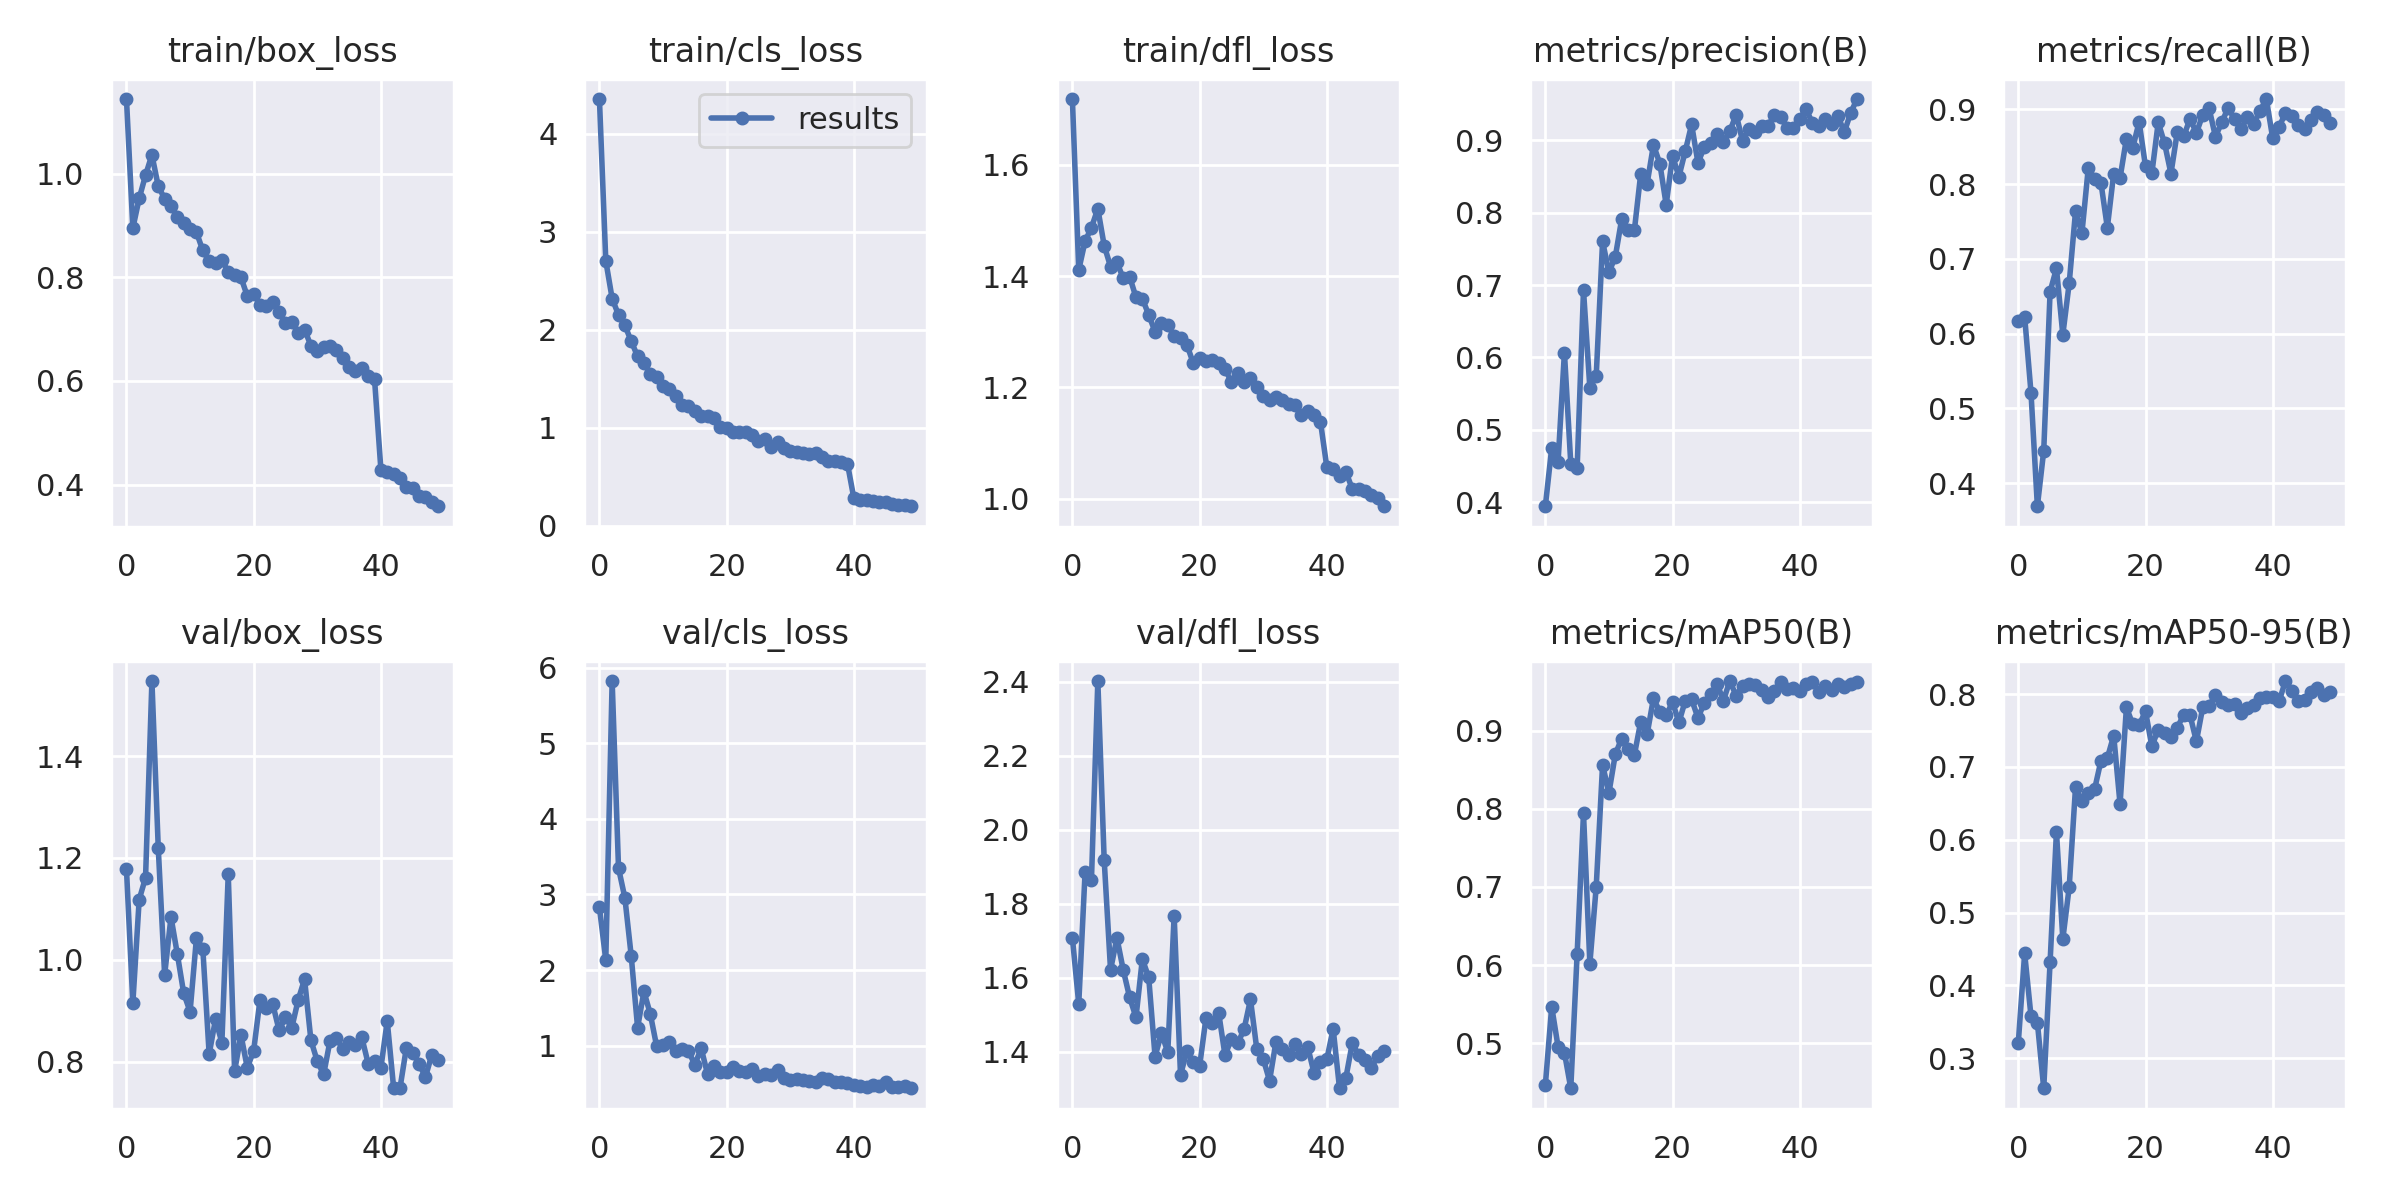

In [ ]:
# Here is the graph of the training and validation loss
#box loss and class loss is important
# The behavior of the model is convincing the model is coverging, Training more will give better results
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


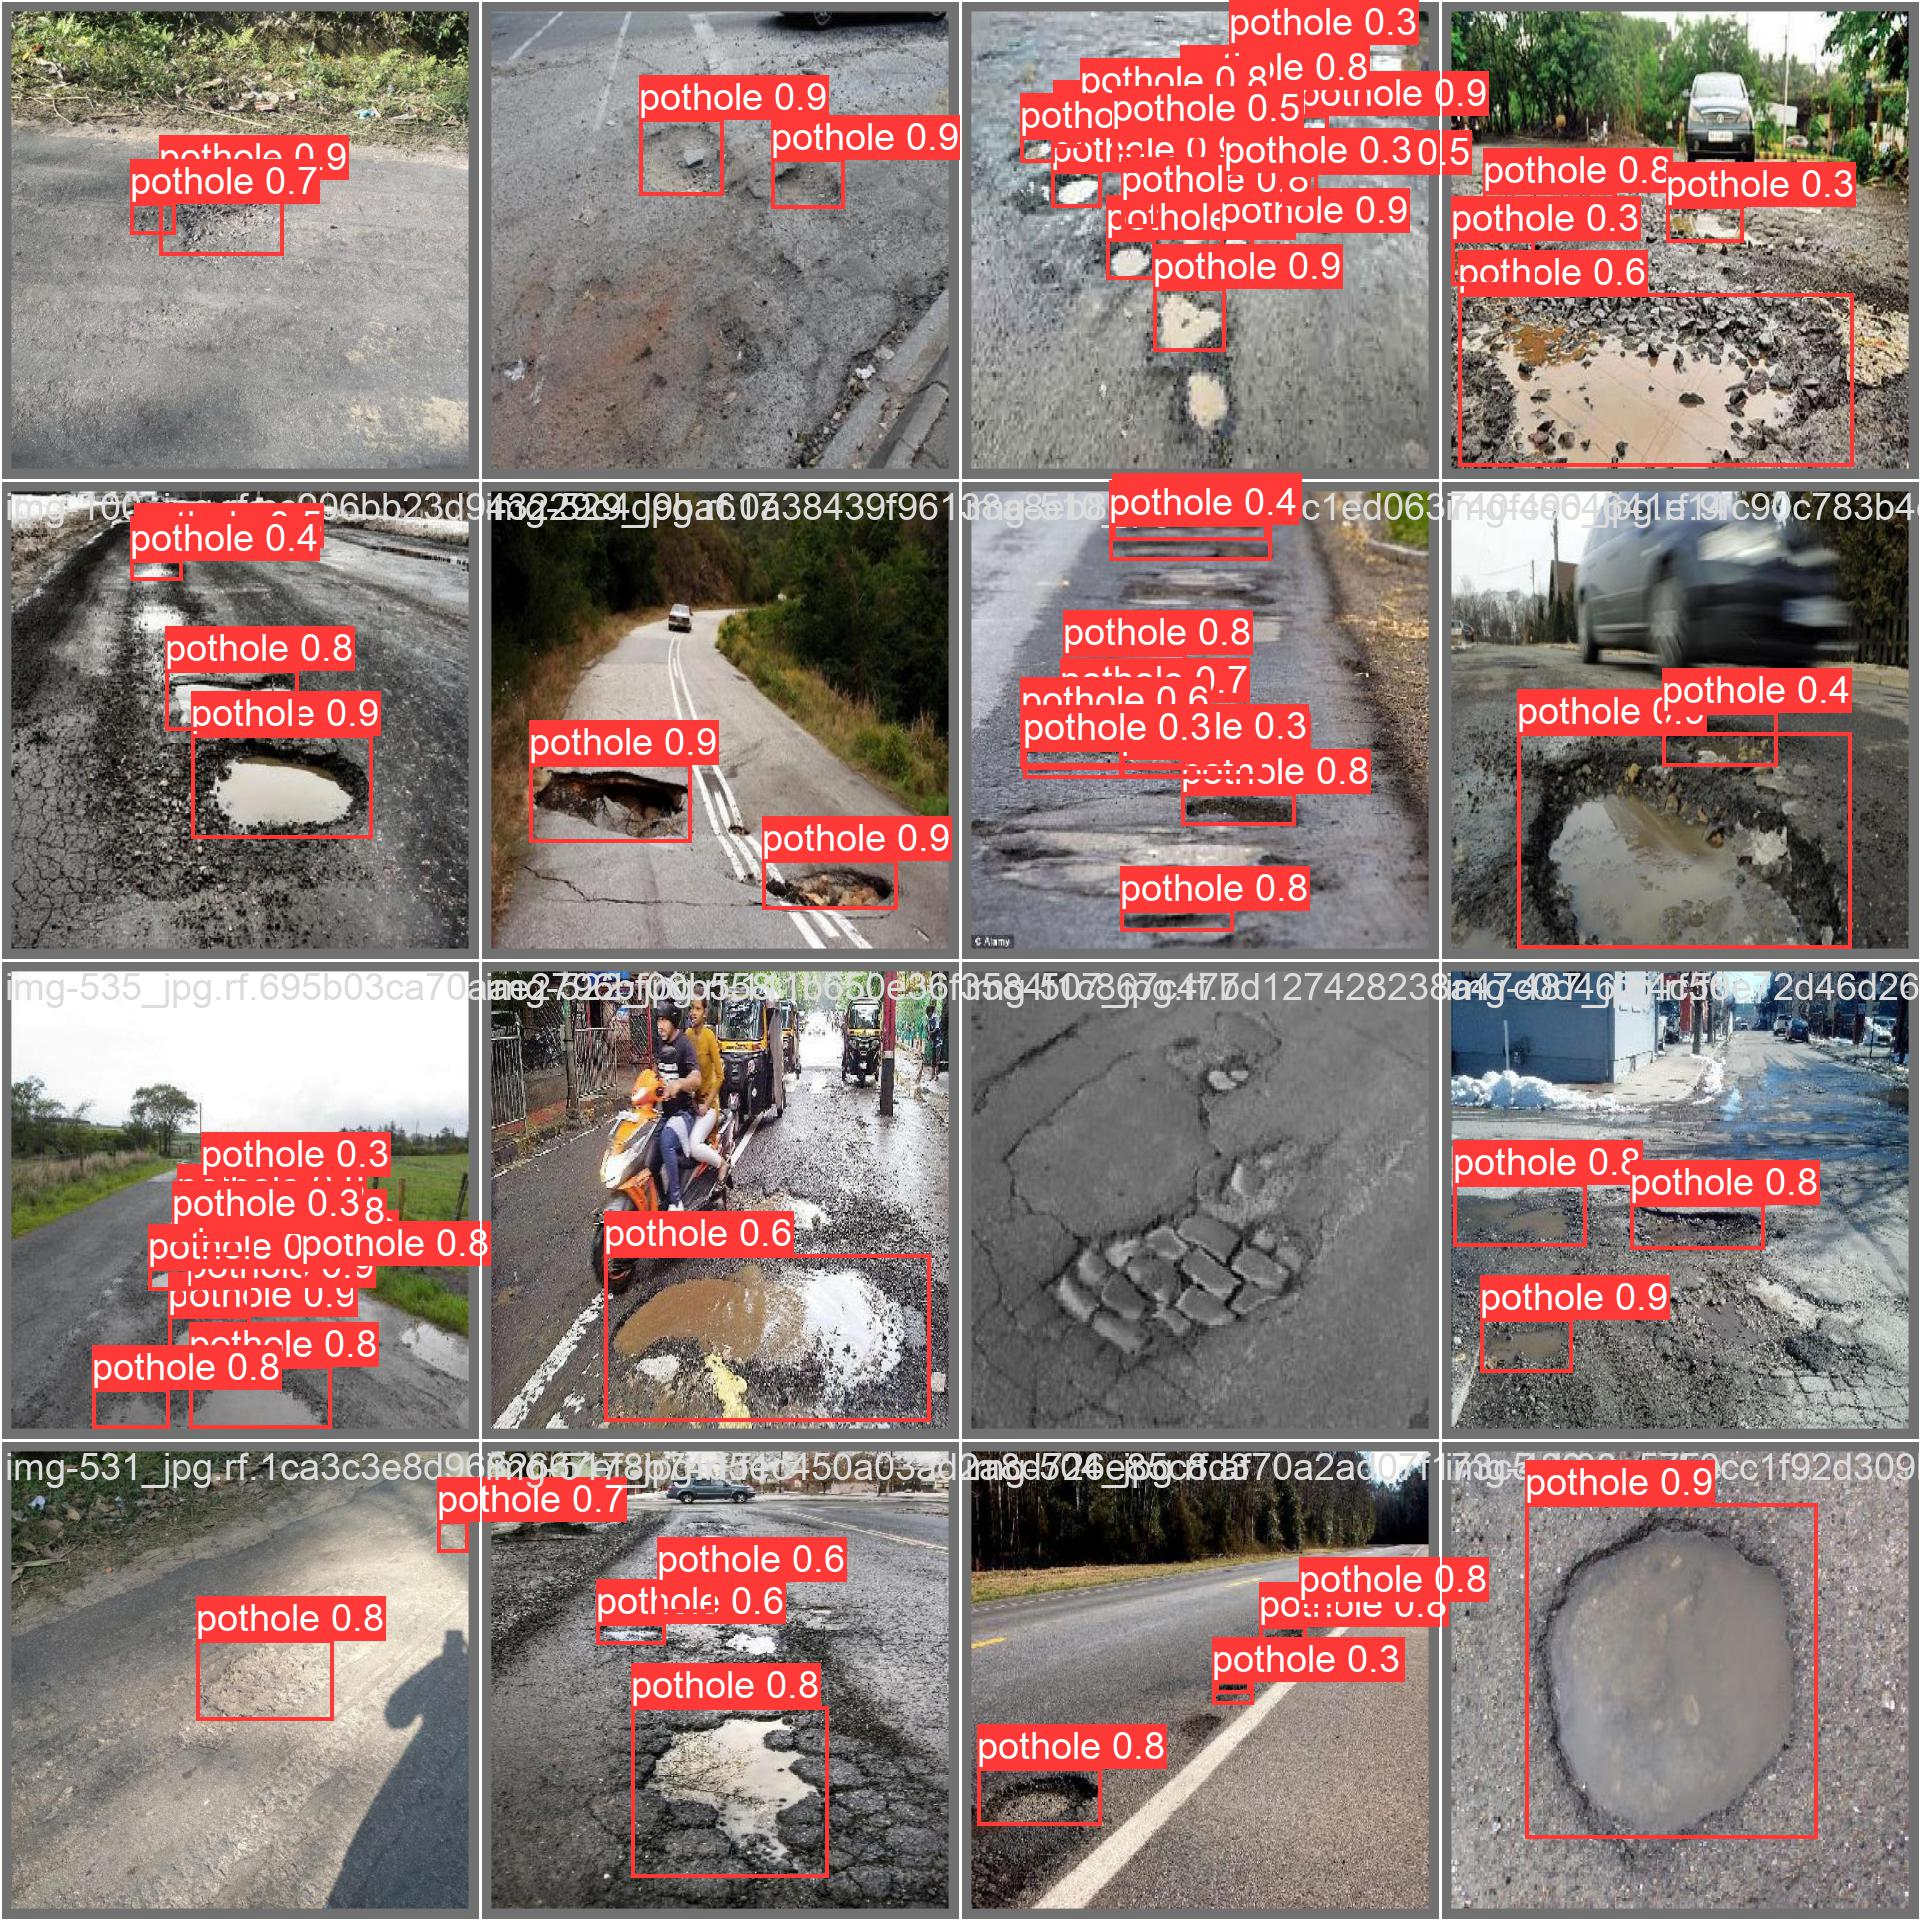

In [ ]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a
#look and see how model is behaving
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

#**Validate Custom Model**

In [ ]:
#Here, we are taking the model best weights and using them to validate the model. Similarly as before we are using
#CLI to do that, The only difference is our mode = val instead of train
#Validation Script is using test dataset that was not used beforew

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/Potholes-Detection-YOLOv8/data.yaml

/content
Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/Potholes-Detection-YOLOv8/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100% 133/133 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:06<00:00,  1.50it/s]
                   all        133        418      0.714      0.694      0.721      0.407
Speed: 2.0ms pre-process, 22.1ms inference, 0.0ms loss, 2.7ms post-process per image


#**Inference with Custom Model**

In [ ]:
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/Potholes-Detection-YOLOv8/test/images

/content
Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
image 1/67 /content/datasets/Potholes-Detection-YOLOv8/test/images/img-113_jpg.rf.9738508ac54df2109df99d8f412272b4.jpg: 640x640 2 potholes, 38.1ms
image 2/67 /content/datasets/Potholes-Detection-YOLOv8/test/images/img-125_jpg.rf.510f86256b931c746e1b27ddcb89bd1a.jpg: 640x640 1 pothole, 34.4ms
image 3/67 /content/datasets/Potholes-Detection-YOLOv8/test/images/img-144_jpg.rf.8ac5cfd8f3b1b3a72ca701d9054ce462.jpg: 640x640 2 potholes, 34.3ms
image 4/67 /content/datasets/Potholes-Detection-YOLOv8/test/images/img-159_jpg.rf.6c3f623d66240225b86a78d1c7e69aa0.jpg: 640x640 4 potholes, 34.1ms
image 5/67 /content/datasets/Potholes-Detection-YOLOv8/test/images/img-183_jpg.rf.37651b32dbc132f253d3b13a2a64b66e.jpg: 640x640 2 potholes, 28.5ms
image 6/67 /content/datasets/Potholes-Detection-YOLOv8/test/images/img-185_jpg.r

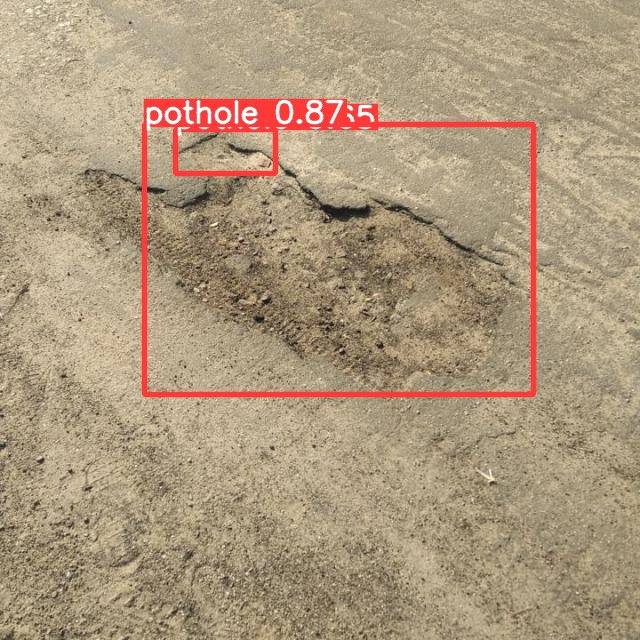

In [ ]:
Image("/content/runs/detect/predict/1.jpg")

#**Testing on a Demo Video**

In [ ]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 232MB/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/demo.mp4'

/content
Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/324) /content/demo.mp4: 384x640 3 potholes, 27.2ms
video 1/1 (2/324) /content/demo.mp4: 384x640 2 potholes, 26.4ms
video 1/1 (3/324) /content/demo.mp4: 384x640 2 potholes, 23.7ms
video 1/1 (4/324) /content/demo.mp4: 384x640 2 potholes, 23.7ms
video 1/1 (5/324) /content/demo.mp4: 384x640 3 potholes, 23.7ms
video 1/1 (6/324) /content/demo.mp4: 384x640 4 potholes, 23.7ms
video 1/1 (7/324) /content/demo.mp4: 384x640 2 potholes, 23.7ms
video 1/1 (8/324) /content/demo.mp4: 384x640 4 potholes, 17.0ms
video 1/1 (9/324) /content/demo.mp4: 384x640 5 potholes, 16.7ms
video 1/1 (10/324) /content/demo.mp4: 384x640 4 potholes, 16.7ms
video 1/1 (11/324) /content/demo.mp4: 384x640 5 potholes, 16.6ms
video 1/1 (12/324) /content/demo.mp4: 384x640 4 potholes, 16.6ms
video 1/1 (13/324) /content/demo.mp4: 384x6

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict2/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)